# Logistic Regression

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Data

In [4]:
train = pd.read_csv('titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## EDA

In [9]:
# Looking at null values of each table
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

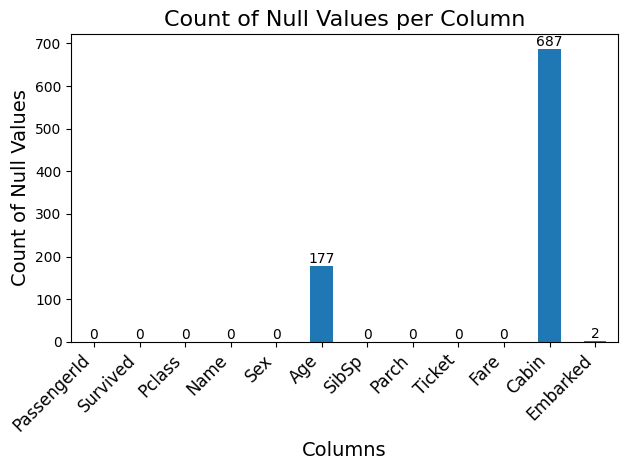

In [17]:
# Ploting missing values

train.isnull().sum().plot(kind='bar')

plt.title('Count of Null Values per Column', fontsize=16)
plt.xlabel('Columns', fontsize=14)
plt.ylabel('Count of Null Values', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate and align x-axis labels

# Add annotations for each bar
for index, value in enumerate(train.isnull().sum()):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom', fontsize=10, color='black')

# x (index), y(value) :- The position to place the text. By default, this is in data coordinates. The coordinate system can be changed using the transform parameter.

# s(str(value)) :-  The text.

# horizontalalignment='center', verticalalignment='bottom'

plt.tight_layout()  # Adjust layout to prevent label overlap
plt.show()

In [22]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Survived', ylabel='count'>

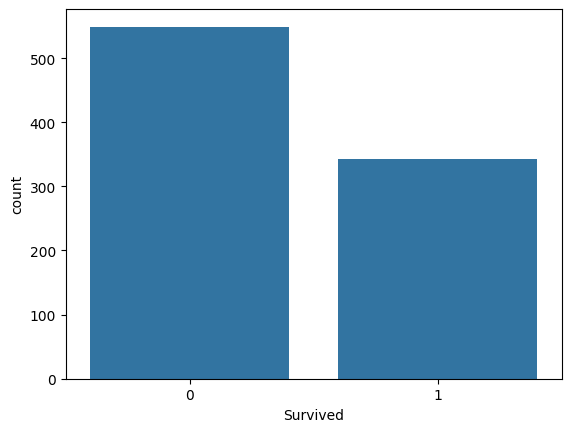

In [20]:
# Let's look at differnet columns

sns.countplot(x='Survived', data=train)

<Axes: xlabel='Survived', ylabel='count'>

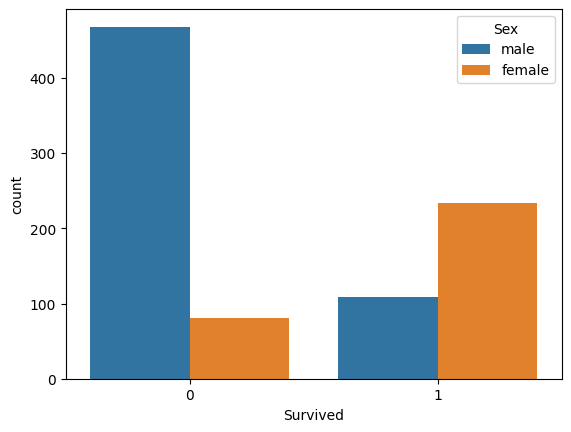

In [21]:
sns.countplot(x='Survived', hue='Sex', data=train)

<Axes: xlabel='Survived', ylabel='count'>

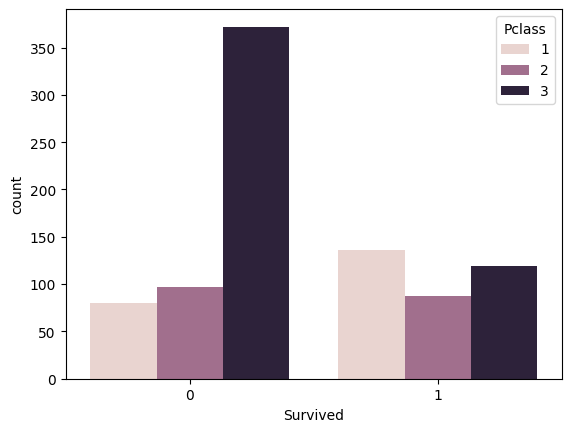

In [26]:
sns.countplot(x='Survived', hue='Pclass', data=train)

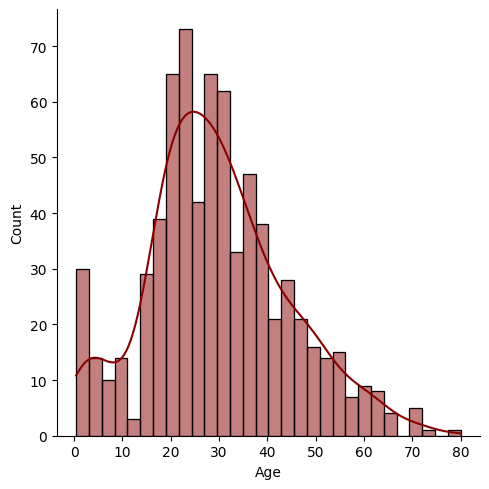

In [30]:
# Let's see the distribution

sns.displot(train['Age'].dropna(), kde=True, color='darkred', bins=30)

<Axes: xlabel='SibSp', ylabel='count'>

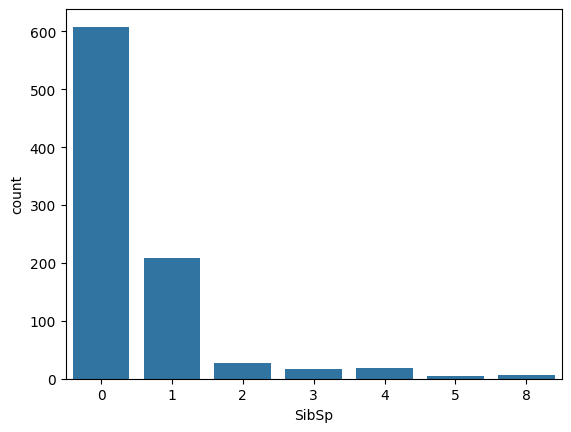

In [31]:
sns.countplot(x='SibSp', data=train)

<Axes: >

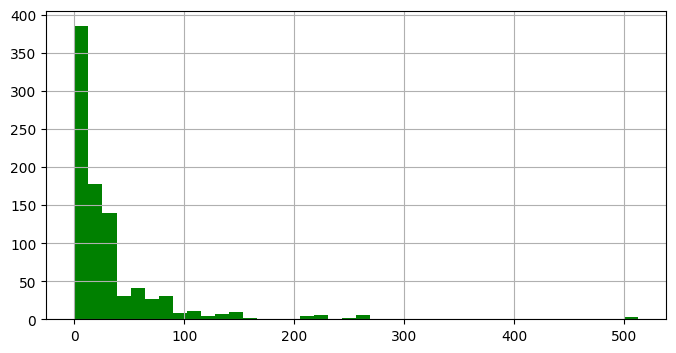

In [33]:
train['Fare'].hist(color='green', bins=40, figsize=(8,4))

## Data Cleaning

/var/folders/lq/bb09dcm13557jqlh7zyq8n_c0000gn/T/ipykernel_15176/2767398120.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y='Age', data=train, palette='winter')


<Axes: xlabel='Pclass', ylabel='Age'>

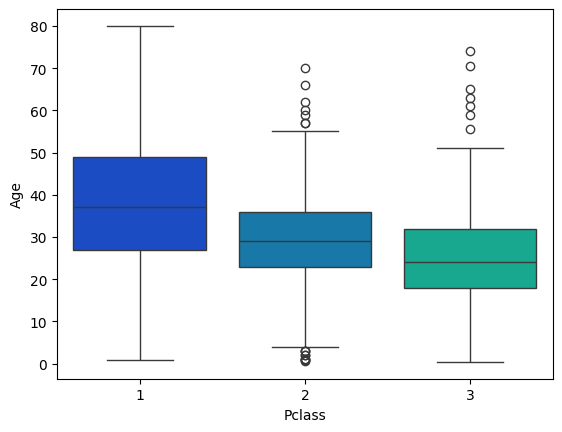

In [35]:
sns.boxplot(x='Pclass', y='Age', data=train, palette='winter')

In [36]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

### Input Table

| Age  | Pclass |
|------|--------|
| 22.0 | 3      |
| NaN  | 1      |
| NaN  | 2      |
| NaN  | 3      |
| 35.0 | 1      |


Step-by-Step Execution:

*Row 1:*
Age = 22.0, Pclass = 3.
Age is not null, so the function returns 22.0.

*Row 2:*
Age = NaN, Pclass = 1.
Age is null, and Pclass = 1, so the function returns 37.

*Row 3:*
Age = NaN, Pclass = 2.
Age is null, and Pclass = 2, so the function returns 29.

*Row 4:*
Age = NaN, Pclass = 3.
Age is null, and Pclass = 3, so the function returns 24.

*Row 5:*
Age = 35.0, Pclass = 1.
Age is not null, so the function returns 35.0.

### Output Table

| Age  | Pclass |
|------|--------|
| 22.0 | 3      |
| 37.0 | 1      |
| 29.0 | 2      |
| 24.0 | 3      |
| 35.0 | 1      |





In [37]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

/var/folders/lq/bb09dcm13557jqlh7zyq8n_c0000gn/T/ipykernel_15176/1334420608.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
/var/folders/lq/bb09dcm13557jqlh7zyq8n_c0000gn/T/ipykernel_15176/1334420608.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


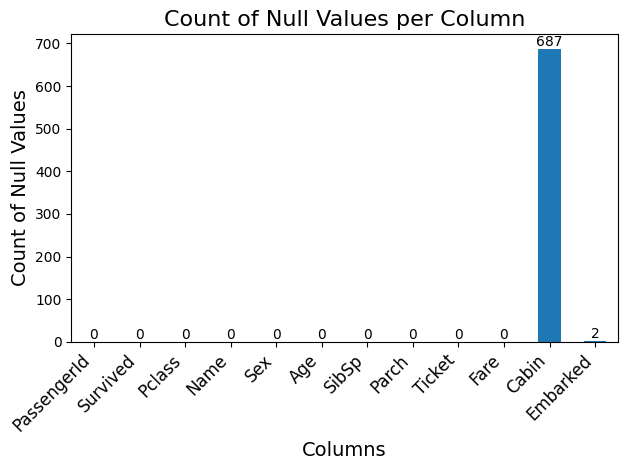

In [39]:
# Ploting missing values now

train.isnull().sum().plot(kind='bar')

plt.title('Count of Null Values per Column', fontsize=16)
plt.xlabel('Columns', fontsize=14)
plt.ylabel('Count of Null Values', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate and align x-axis labels

# Add annotations for each bar
for index, value in enumerate(train.isnull().sum()):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom', fontsize=10, color='black')

# x (index), y(value) :- The position to place the text. By default, this is in data coordinates. The coordinate system can be changed using the transform parameter.

# s(str(value)) :-  The text.

# horizontalalignment='center', verticalalignment='bottom'

plt.tight_layout()  # Adjust layout to prevent label overlap
plt.show()

In [40]:
# Lets drop 'Cabin' column

train.drop('Cabin', axis=1, inplace=True)

In [41]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [42]:
train.dropna(inplace=True)

### Converting Categorical Features
We need to convert categorical features to dummy variables using Pandas. Otherwise our machine learning algorithm won't be able to directly take in those feaures as inputs.

In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [44]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
sex

,male
0,True
1,False
2,False
3,False
4,True
...,...
886,True
887,False
888,False
889,True


In [45]:
pd.get_dummies(train['Embarked'])

,C,Q,S
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
886,False,False,True
887,False,False,True
888,False,False,True
889,True,False,False


In [46]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)
embark.head()

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [47]:
# Let's drop the original categorical features

train.drop(['Sex','Embarked','Name','Ticket'], axis=1, inplace=True)

In [48]:
# Let's add new column of dummy values 

train = pd.concat([train,sex,embark], axis=1)
train.head(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True


## Building a Logistic Regression Model

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X = train.drop('Survived', axis=1)
y = train['Survived']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

/opt/anaconda3/envs/python_ds/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

This warning is from scikit-learn's LogisticRegression implementation, and it indicates that the optimization algorithm (in this case, LBFGS, the default solver) did not converge to a solution within the maximum number of iterations allowed. Here's what it means and how to address it:

*What Does This Warning Mean?*

**Logistic Regression Optimization:**
Logistic regression uses an iterative optimization algorithm (like LBFGS) to find the best coefficients for the model by maximizing the log-likelihood function.
If the algorithm stops before finding an optimal solution, it may not have found the best possible coefficients for your data.

*Why It Happens:*

**Large or Unscaled Data:**
Features with very large or small values can lead to numerical instability, making it harder for the solver to converge.

**Insufficient Iterations:**
By default, scikit-learn sets a maximum number of iterations (max_iter=100), and the solver might need more iterations for complex datasets.

**Poorly Conditioned Data:**
Highly correlated features or redundant data can slow down or prevent convergence.

**Imbalanced Data:**
If one class heavily outweighs the other, the algorithm may struggle to find a proper decision boundary.


*How to Fix This?*

**1. Increase the Maximum Number of Iterations**
The simplest fix is to increase the max_iter parameter:

from sklearn.linear_model import LogisticRegression

***model = LogisticRegression(max_iter=500)***

***model.fit(X, y)***



**2. Scale Your Data**

Logistic regression works better when all features are on a similar scale. Use standardization or normalization:

Standardization: Subtract the mean and divide by the standard deviation.
Example using StandardScaler:

from sklearn.preprocessing import StandardScaler

***scaler = StandardScaler()***

***X_scaled = scaler.fit_transform(X)***

***model = LogisticRegression()***

***model.fit(X_scaled, y)***


**3. Try a Different Solver**

Different solvers may work better depending on your data:

Default *(LBFGS)*: Efficient for smaller datasets.

Alternative Solvers:

*‘saga’*: Works well with large datasets and supports L1/L2 regularization.

*‘liblinear’*: Good for small datasets.

*‘newton-cg’*: More robust for convergence.




In [54]:
predictions = logmodel.predict(X_test)

### Evaluation

In [55]:
from sklearn.metrics import classification_report

In [56]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       163
           1       0.81      0.62      0.71       104

    accuracy                           0.80       267
   macro avg       0.80      0.77      0.78       267
weighted avg       0.80      0.80      0.79       267



## With saga

In [62]:
logmodel = LogisticRegression(solver='saga', max_iter=2000)
logmodel.fit(X_train, y_train)

/opt/anaconda3/envs/python_ds/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=2000, solver='saga')

In [63]:
predictions = logmodel.predict(X_test)

In [64]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.68      0.96      0.79       163
           1       0.81      0.29      0.43       104

    accuracy                           0.70       267
   macro avg       0.74      0.62      0.61       267
weighted avg       0.73      0.70      0.65       267



## Scale data with StandardScaler

In [65]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

logmodel = LogisticRegression()
logmodel.fit(X_scaled, y)


LogisticRegression()

In [66]:
predictions = logmodel.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.66      0.82      0.73       163
           1       0.55      0.35      0.42       104

    accuracy                           0.63       267
   macro avg       0.60      0.58      0.58       267
weighted avg       0.62      0.63      0.61       267



/opt/anaconda3/envs/python_ds/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
